In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
salary = pd.read_csv('Salary_Data.csv')

In [3]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

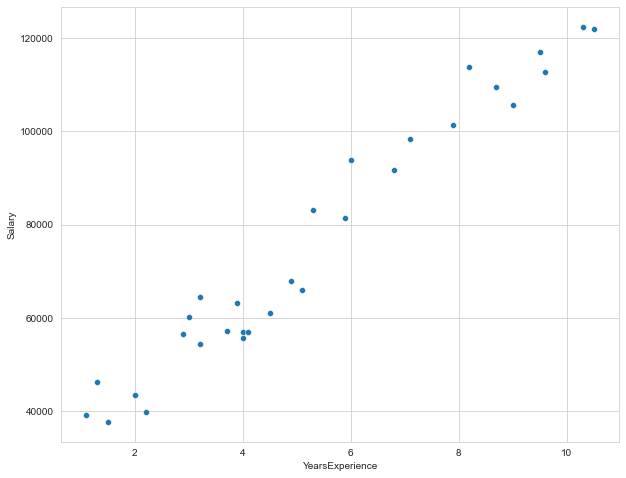

In [13]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.scatterplot(x='YearsExperience', y='Salary', data=salary)
plt.show()

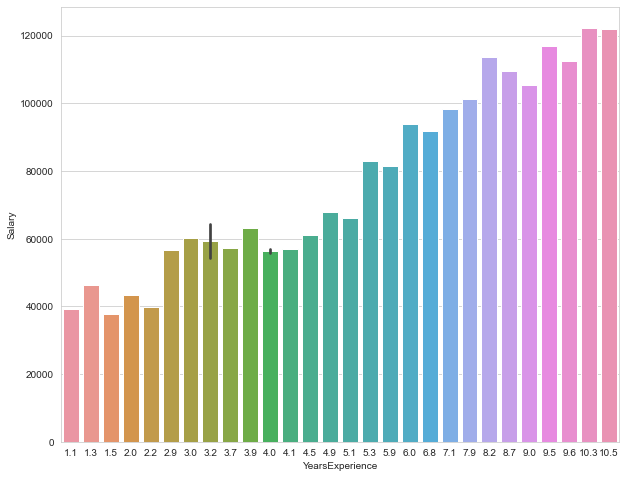

In [14]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.barplot(x='YearsExperience', y='Salary', data=salary)
plt.show()

# Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
X = salary.iloc[:,:-1]
y = salary.iloc[:,1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
ln = LinearRegression()

In [27]:
ln.fit(X_train, y_train)

LinearRegression()

In [70]:
print('Coff',ln.coef_)

Coff [9577.17174975]


In [71]:
print('intercept',ln.intercept_)

intercept 25975.814659541138


In [42]:
Y0 = ln.coef_*X_train+ln.intercept_

Text(0, 0.5, 'Salary')

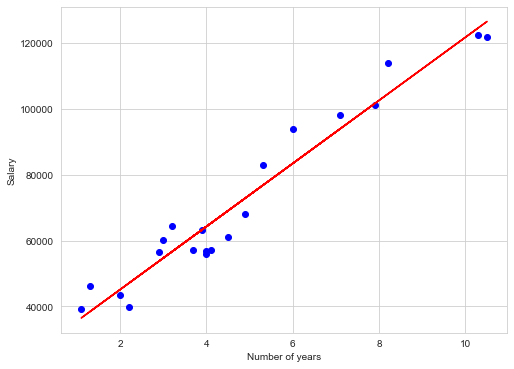

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, Y0, color='red')
plt.xlabel('Number of years')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

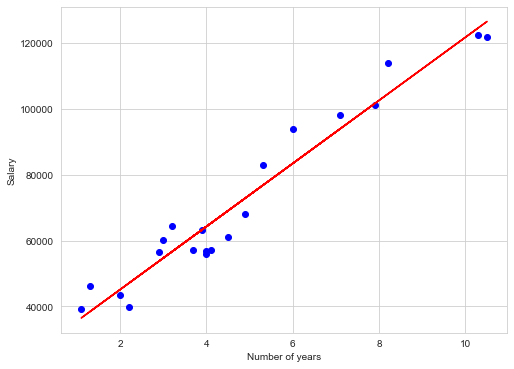

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, ln.predict(X_train), color='red')
plt.xlabel('Number of years')
plt.ylabel('Salary')

In [57]:
predict = ln.predict(X_test)

In [58]:
predict

array([ 91100.58255782, 109297.20888234,  56622.76425873,  82481.12798305,
        40341.57228416, 117916.66345711, 116958.94628213,  74819.39058325,
       112170.36040726])

Text(0, 0.5, 'Salary')

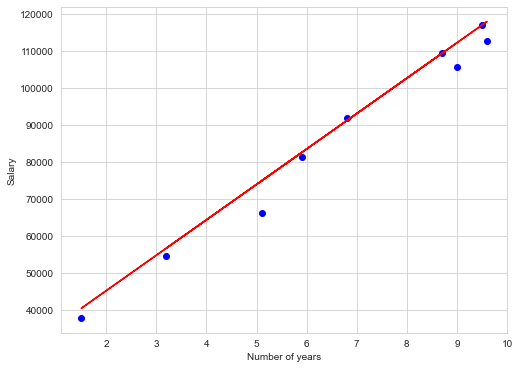

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, predict, color='red')
plt.xlabel('Number of years')
plt.ylabel('Salary')

In [93]:
df = pd.DataFrame({'Actual':y_test, 'predicted':predict, 'Difference':(y_test-predict)})

In [95]:
df.head()

,Actual,predicted,Difference
20,91738.0,91100.582558,637.417442
24,109431.0,109297.208882,133.791118
7,54445.0,56622.764259,-2177.764259
18,81363.0,82481.127983,-1118.127983
2,37731.0,40341.572284,-2610.572284


In [63]:
from sklearn import metrics

In [75]:
print('r2_score:',metrics.r2_score(y_test, predict))

r2_score: 0.9746363787521536


In [78]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predict)))

RMSE: 4240.095458517901


In [81]:
print('Predict the salary of 8 years experience:',ln.predict([[8]]))

Predict the salary of 8 years experience: [102593.18865751]


# DecisionTreeRegressor

In [144]:
from sklearn.tree import DecisionTreeRegressor

In [145]:
dtree = DecisionTreeRegressor()

In [146]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [147]:
prediction = dtree.predict(X_test)

In [148]:
prediction

array([ 98273., 113812.,  64445.,  93940.,  46205., 122391., 122391.,
        67938., 113812.])

In [149]:
df = pd.DataFrame({'Actual':y_test, 'predicted':prediction, 'Difference':(y_test-prediction)})

In [150]:
df.head()

,Actual,predicted,Difference
20,91738.0,98273.0,-6535.0
24,109431.0,113812.0,-4381.0
7,54445.0,64445.0,-10000.0
18,81363.0,93940.0,-12577.0
2,37731.0,46205.0,-8474.0


In [151]:
from sklearn import metrics

In [152]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE: 8081.830045781023


In [153]:
print('r2_score', metrics.r2_score(y_test, prediction))

r2_score 0.9078533782708867


In [154]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

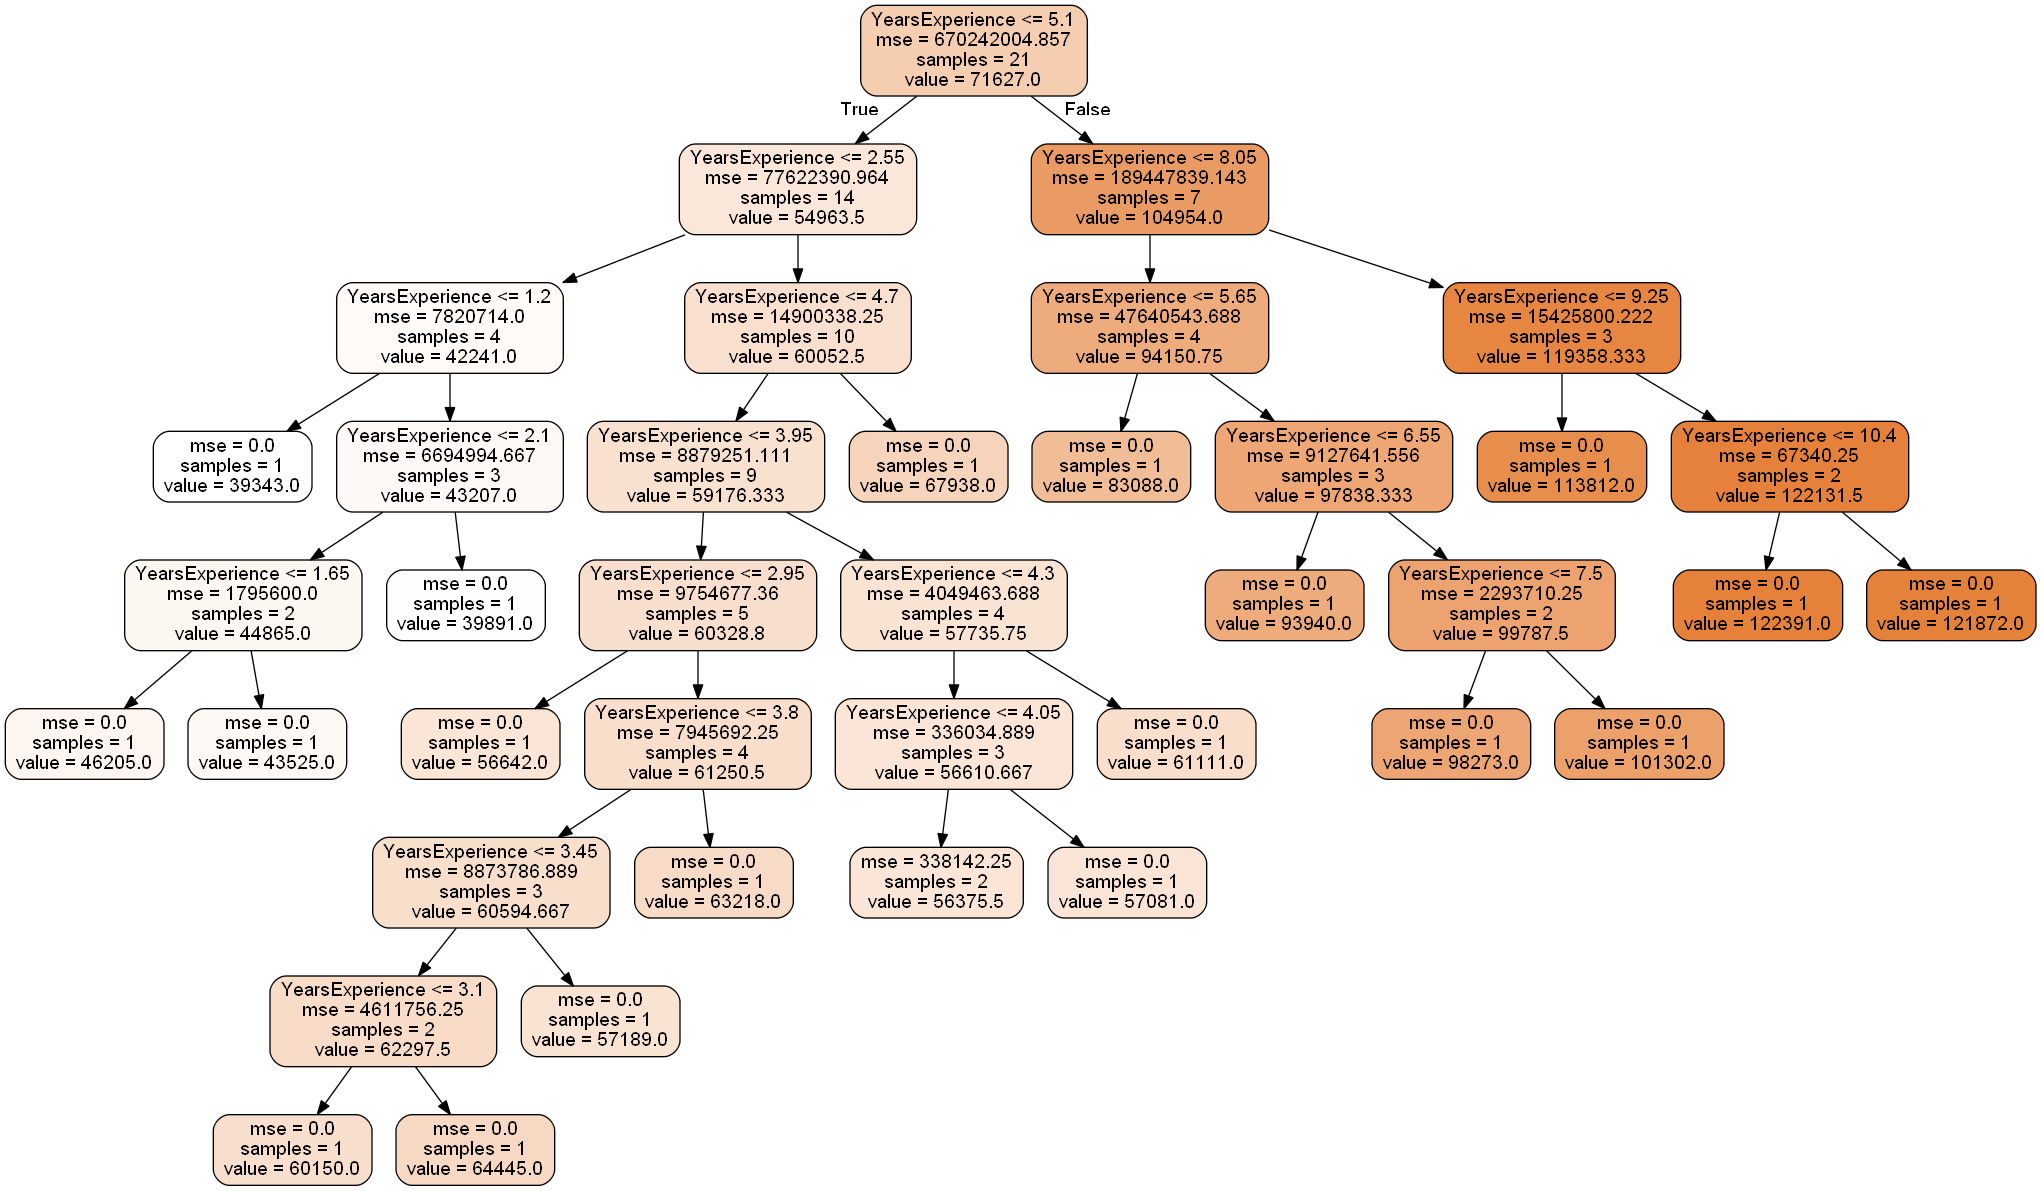

In [157]:
export_graphviz(dtree,out_file='Decision_tree.dot', feature_names=list(X.columns),filled=True, rounded=True)
(graph,) = pydot.graph_from_dot_file('Decision_tree.dot')
graph.write_png('Decision_tree.png')
Image('Decision_tree.png')